In [1]:
# importing libraries
import pandas as pd # the pd is by convention
import numpy as np # as is the np
import geopandas as gpd
from shapely.geometry import Point
from scipy import stats
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from io import BytesIO
import requests
from sodapy import Socrata
import os
import zipfile
from zipfile import ZipFile
import json
import pylab as pl 
import shapely
from fiona.crs import from_epsg
import urllib
from matplotlib.ticker import FuncFormatter
import matplotlib.dates as mdates
import matplotlib.ticker as plticker
import matplotlib.ticker as ticker
from matplotlib.dates import DateFormatter
import matplotlib.dates as dates

# to Plot matplotlib figures inline on the notebook
%matplotlib inline
sns.set(color_codes=True)

In [2]:
# Enter the information from those sections here
socrata_domain = 'data.cityofnewyork.us' # nyc open data domain
socrata_dataset_identifier = 'erm2-nwe9' # 311 dataset identifier

# App Tokens can be generated by creating an account at https://opendata.socrata.com/signup
# Tokens are optional (`None` can be used instead), though requests will be rate limited.
#
# If you choose to use a token, run the following command on the terminal (or add it to your .bashrc)
# $ export APP_TOKEN_311=<token>
socrata_token = os.environ.get("APP_TOKEN_311")              

In [3]:
client = Socrata(socrata_domain, socrata_token)
print("Domain: {domain:}\nSession: {session:}\nURI Prefix: {uri_prefix:}".format(**client.__dict__))

Domain: data.cityofnewyork.us
Session: <requests.sessions.Session object at 0x103f560b8>
URI Prefix: https://


In [4]:
client = Socrata(socrata_domain, socrata_token)
results = client.get(socrata_dataset_identifier, limit=15000, q="Social Distancing", select="*")

In [5]:
social_distancing = pd.DataFrame.from_dict(results)
social_distancing.head()

,unique_key,created_date,closed_date,agency,agency_name,complaint_type,descriptor,location_type,incident_zip,incident_address,...,bbl,borough,x_coordinate_state_plane,y_coordinate_state_plane,open_data_channel_type,park_facility_name,park_borough,latitude,longitude,location
0,45975594,2020-04-11T01:50:25.000,2020-04-11T02:27:47.000,NYPD,New York City Police Department,Non-Emergency Police Matter,Social Distancing,Residential Building/House,10025,222 WEST 104 STREET,...,1018750042,MANHATTAN,993247,230550,ONLINE,Unspecified,MANHATTAN,40.799477899696285,-73.96750426182348,"{'latitude': '40.799477899696285', 'longitude'..."
1,45975654,2020-04-11T00:14:28.000,2020-04-11T02:17:36.000,NYPD,New York City Police Department,Non-Emergency Police Matter,Social Distancing,NaN,10451,304 EAST 156 STREET,...,2024130001,BRONX,1006604,238672,PHONE,Unspecified,BRONX,40.82174682885639,-73.9192338660681,"{'latitude': '40.82174682885639', 'longitude':..."
2,45979340,2020-04-11T01:23:11.000,2020-04-11T02:51:58.000,NYPD,New York City Police Department,Non-Emergency Police Matter,Social Distancing,Residential Building/House,10301,16 YORK AVENUE,...,5000620115,STATEN ISLAND,959527,174678,PHONE,Unspecified,STATEN ISLAND,40.64609289425298,-74.08909029082956,"{'latitude': '40.64609289425298', 'longitude':..."
3,45979351,2020-04-11T01:40:59.000,2020-04-11T03:12:06.000,NYPD,New York City Police Department,Non-Emergency Police Matter,Social Distancing,Store/Commercial,11238,325 LAFAYETTE AVENUE,...,3019337501,BROOKLYN,994710,190164,ONLINE,Unspecified,BROOKLYN,40.68862684267836,-73.96228294511846,"{'latitude': '40.68862684267836', 'longitude':..."
4,45980013,2020-04-11T00:54:43.000,2020-04-11T10:07:20.000,NYPD,New York City Police Department,Non-Emergency Police Matter,Social Distancing,Store/Commercial,10465,815 HUTCHINSON RIVER PARKWAY,...,2055597501,BRONX,1029523,239410,PHONE,Unspecified,BRONX,40.823684692606086,-73.83642152303273,"{'latitude': '40.823684692606086', 'longitude'..."


In [6]:
social_distancing.shape

(13935, 31)

In [7]:
social_distancing.descriptor.value_counts()

Social Distancing    13935
Name: descriptor, dtype: int64

In [8]:
social_distancing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13935 entries, 0 to 13934
Data columns (total 31 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   unique_key                      13935 non-null  object
 1   created_date                    13935 non-null  object
 2   closed_date                     13912 non-null  object
 3   agency                          13935 non-null  object
 4   agency_name                     13935 non-null  object
 5   complaint_type                  13935 non-null  object
 6   descriptor                      13935 non-null  object
 7   location_type                   11361 non-null  object
 8   incident_zip                    13934 non-null  object
 9   incident_address                13934 non-null  object
 10  street_name                     13934 non-null  object
 11  cross_street_1                  13916 non-null  object
 12  cross_street_2                  13919 non-null

In [9]:
social_distancing.iloc[:,:15].head()

,unique_key,created_date,closed_date,agency,agency_name,complaint_type,descriptor,location_type,incident_zip,incident_address,street_name,cross_street_1,cross_street_2,intersection_street_1,intersection_street_2
0,45975594,2020-04-11T01:50:25.000,2020-04-11T02:27:47.000,NYPD,New York City Police Department,Non-Emergency Police Matter,Social Distancing,Residential Building/House,10025,222 WEST 104 STREET,WEST 104 STREET,AMSTERDAM AVENUE,BROADWAY,AMSTERDAM AVENUE,BROADWAY
1,45975654,2020-04-11T00:14:28.000,2020-04-11T02:17:36.000,NYPD,New York City Police Department,Non-Emergency Police Matter,Social Distancing,NaN,10451,304 EAST 156 STREET,EAST 156 STREET,CONCOURSE VILLAGE EAST,COURTLANDT AVENUE,CONCOURSE VILLAGE EAST,COURTLANDT AVENUE
2,45979340,2020-04-11T01:23:11.000,2020-04-11T02:51:58.000,NYPD,New York City Police Department,Non-Emergency Police Matter,Social Distancing,Residential Building/House,10301,16 YORK AVENUE,YORK AVENUE,RICHMOND TERRACE,VAN BUREN STREET,RICHMOND TERRACE,VAN BUREN STREET
3,45979351,2020-04-11T01:40:59.000,2020-04-11T03:12:06.000,NYPD,New York City Police Department,Non-Emergency Police Matter,Social Distancing,Store/Commercial,11238,325 LAFAYETTE AVENUE,LAFAYETTE AVENUE,GRAND AVENUE,CLASSON AVENUE,GRAND AVENUE,CLASSON AVENUE
4,45980013,2020-04-11T00:54:43.000,2020-04-11T10:07:20.000,NYPD,New York City Police Department,Non-Emergency Police Matter,Social Distancing,Store/Commercial,10465,815 HUTCHINSON RIVER PARKWAY,HUTCHINSON RIVER PARKWAY,WENNER PLACE,LAFAYETTE AVENUE,WENNER PLACE,LAFAYETTE AVENUE


In [10]:
social_distancing.iloc[:,15:30].head()

,city,landmark,status,resolution_description,resolution_action_updated_date,community_board,bbl,borough,x_coordinate_state_plane,y_coordinate_state_plane,open_data_channel_type,park_facility_name,park_borough,latitude,longitude
0,NEW YORK,WEST 104 STREET,Closed,The Police Department responded to the complai...,2020-04-11T06:28:15.000,07 MANHATTAN,1018750042,MANHATTAN,993247,230550,ONLINE,Unspecified,MANHATTAN,40.799477899696285,-73.96750426182348
1,BRONX,EAST 156 STREET,Closed,The Police Department responded to the complai...,2020-04-11T06:17:42.000,01 BRONX,2024130001,BRONX,1006604,238672,PHONE,Unspecified,BRONX,40.82174682885639,-73.9192338660681
2,STATEN ISLAND,YORK AVENUE,Closed,The Police Department responded to the complai...,2020-04-11T06:52:03.000,01 STATEN ISLAND,5000620115,STATEN ISLAND,959527,174678,PHONE,Unspecified,STATEN ISLAND,40.64609289425298,-74.08909029082956
3,BROOKLYN,LAFAYETTE AVENUE,Closed,The Police Department responded to the complai...,2020-04-11T07:12:12.000,02 BROOKLYN,3019337501,BROOKLYN,994710,190164,ONLINE,Unspecified,BROOKLYN,40.68862684267836,-73.96228294511846
4,BRONX,HUTCHINSON RIVER PARKWAY SR,Closed,The Police Department responded to the complai...,2020-04-11T14:07:22.000,10 BRONX,2055597501,BRONX,1029523,239410,PHONE,Unspecified,BRONX,40.823684692606086,-73.83642152303273


In [11]:
social_distancing.to_csv('data/social-distancing-311', index=False)

In [12]:
social_distancing = pd.read_csv('data/social-distancing-311')

In [13]:
social_distancing.shape

(13935, 31)

In [14]:
social_distancing.head()

,unique_key,created_date,closed_date,agency,agency_name,complaint_type,descriptor,location_type,incident_zip,incident_address,...,bbl,borough,x_coordinate_state_plane,y_coordinate_state_plane,open_data_channel_type,park_facility_name,park_borough,latitude,longitude,location
0,45975594,2020-04-11T01:50:25.000,2020-04-11T02:27:47.000,NYPD,New York City Police Department,Non-Emergency Police Matter,Social Distancing,Residential Building/House,10025.0,222 WEST 104 STREET,...,1.018750e+09,MANHATTAN,993247.0,230550.0,ONLINE,Unspecified,MANHATTAN,40.799478,-73.967504,"{'latitude': '40.799477899696285', 'longitude'..."
1,45975654,2020-04-11T00:14:28.000,2020-04-11T02:17:36.000,NYPD,New York City Police Department,Non-Emergency Police Matter,Social Distancing,NaN,10451.0,304 EAST 156 STREET,...,2.024130e+09,BRONX,1006604.0,238672.0,PHONE,Unspecified,BRONX,40.821747,-73.919234,"{'latitude': '40.82174682885639', 'longitude':..."
2,45979340,2020-04-11T01:23:11.000,2020-04-11T02:51:58.000,NYPD,New York City Police Department,Non-Emergency Police Matter,Social Distancing,Residential Building/House,10301.0,16 YORK AVENUE,...,5.000620e+09,STATEN ISLAND,959527.0,174678.0,PHONE,Unspecified,STATEN ISLAND,40.646093,-74.089090,"{'latitude': '40.64609289425298', 'longitude':..."
3,45979351,2020-04-11T01:40:59.000,2020-04-11T03:12:06.000,NYPD,New York City Police Department,Non-Emergency Police Matter,Social Distancing,Store/Commercial,11238.0,325 LAFAYETTE AVENUE,...,3.019338e+09,BROOKLYN,994710.0,190164.0,ONLINE,Unspecified,BROOKLYN,40.688627,-73.962283,"{'latitude': '40.68862684267836', 'longitude':..."
4,45980013,2020-04-11T00:54:43.000,2020-04-11T10:07:20.000,NYPD,New York City Police Department,Non-Emergency Police Matter,Social Distancing,Store/Commercial,10465.0,815 HUTCHINSON RIVER PARKWAY,...,2.055598e+09,BRONX,1029523.0,239410.0,PHONE,Unspecified,BRONX,40.823685,-73.836422,"{'latitude': '40.823684692606086', 'longitude'..."


In [15]:
social_distancing.describe()

,unique_key,incident_zip,bbl,x_coordinate_state_plane,y_coordinate_state_plane,latitude,longitude
count,1.393500e+04,13934.000000,1.173800e+04,1.376300e+04,13763.000000,13763.000000,13763.000000
mean,4.596757e+07,10789.226496,2.678478e+09,1.002592e+06,205479.598271,40.730627,-73.933780
std,3.165964e+04,555.061752,1.190433e+09,2.080077e+04,29960.778255,0.082233,0.075026
min,4.590831e+07,83.000000,0.000000e+00,9.135340e+05,121548.000000,40.500049,-74.254298
25%,4.594194e+07,10302.000000,2.024000e+09,9.909330e+05,183524.000000,40.670346,-73.975881
50%,4.596560e+07,11201.000000,3.018620e+09,1.000501e+06,203867.000000,40.726232,-73.941346
75%,4.599374e+07,11229.000000,4.000160e+09,1.013722e+06,229535.000000,40.796564,-73.893541
max,4.602482e+07,11697.000000,5.080260e+09,1.067099e+06,270354.000000,40.908692,-73.701015


In [16]:
social_distancing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13935 entries, 0 to 13934
Data columns (total 31 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   unique_key                      13935 non-null  int64  
 1   created_date                    13935 non-null  object 
 2   closed_date                     13912 non-null  object 
 3   agency                          13935 non-null  object 
 4   agency_name                     13935 non-null  object 
 5   complaint_type                  13935 non-null  object 
 6   descriptor                      13935 non-null  object 
 7   location_type                   11361 non-null  object 
 8   incident_zip                    13934 non-null  float64
 9   incident_address                13934 non-null  object 
 10  street_name                     13934 non-null  object 
 11  cross_street_1                  13916 non-null  object 
 12  cross_street_2                  

<Figure size 1080x720 with 0 Axes>

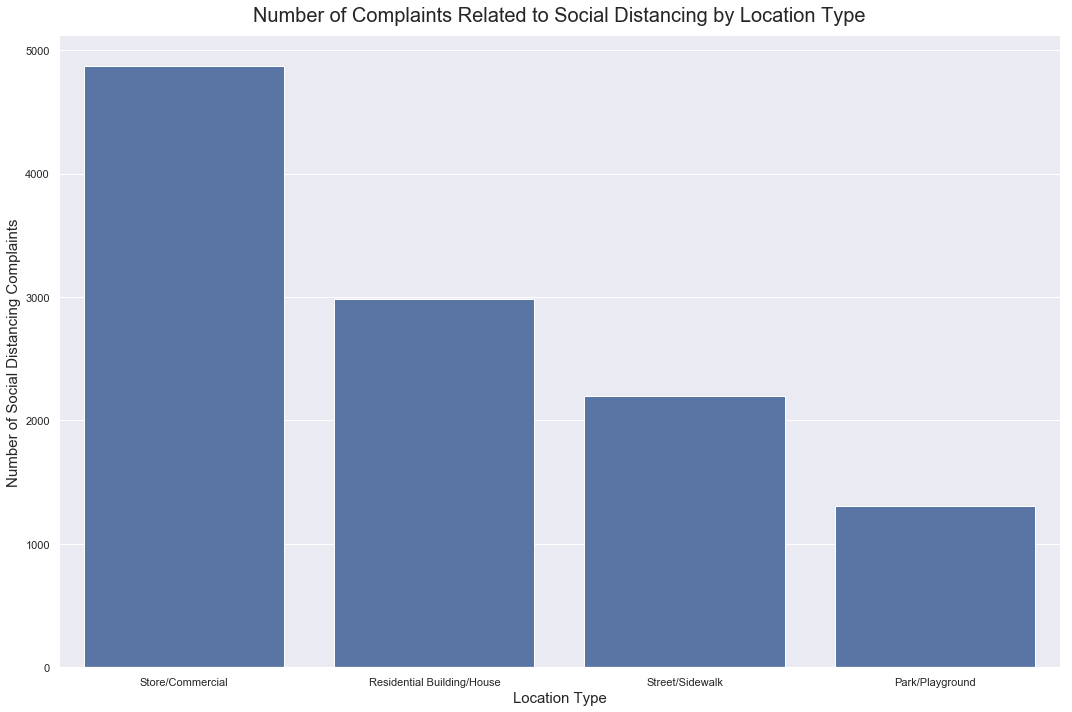

In [17]:
idx = social_distancing.groupby('location_type')['unique_key'].count().sort_values(ascending=False)
idx = idx.index
order = idx.tolist()

plt.figure(figsize=(15,10))
sns.catplot(x="location_type", 
            kind="count", 
            data = social_distancing, 
            color="C0",
            height = 10, 
            aspect = 1.5, 
            order=order)

plt.xlabel('Location Type', fontsize=15)
plt.ylabel('Number of Social Distancing Complaints', fontsize=15)
plt.title('Number of Complaints Related to Social Distancing by Location Type', 
          pad = 15, fontsize=20)
plt.tight_layout()
plt.savefig('figures/complaints_by_locaton_type')

<Figure size 1080x720 with 0 Axes>

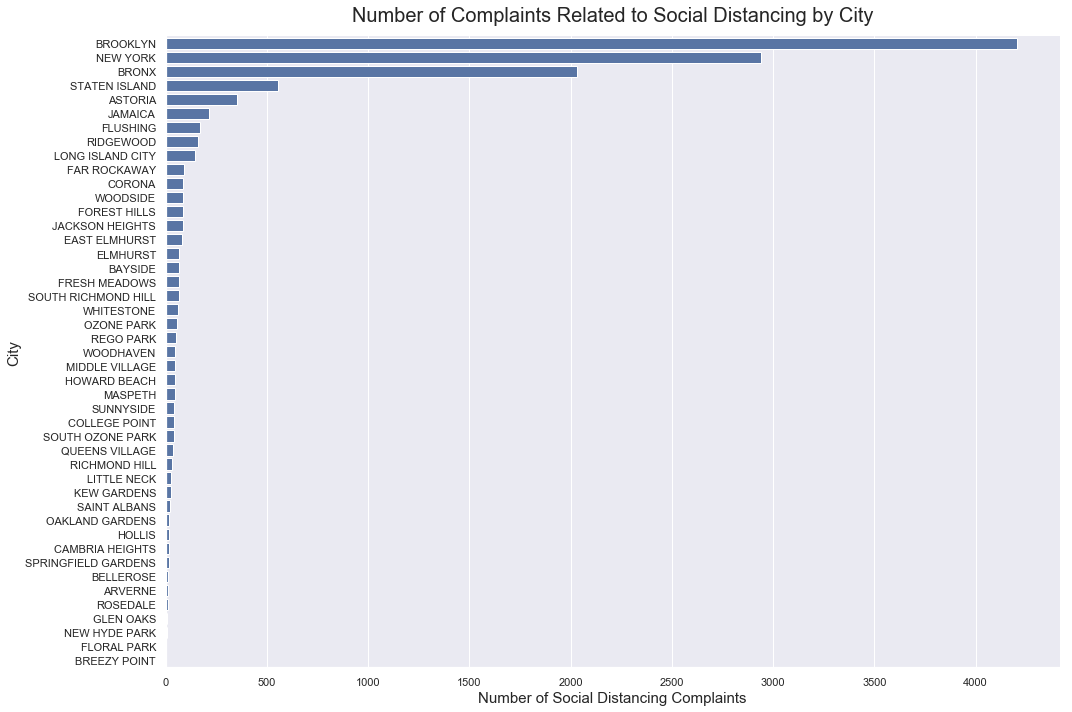

In [18]:
idx = social_distancing.groupby('city')['unique_key'].count().sort_values(ascending=False)
idx = idx.index
order = idx.tolist()

plt.figure(figsize=(15,10))
sns.catplot(y="city", 
            kind="count", 
            data = social_distancing, 
            color="C0",
            height = 10, 
            aspect = 1.5, 
            order=order)

plt.xlabel('Number of Social Distancing Complaints', fontsize=15)
plt.ylabel('City', fontsize=15)
plt.title('Number of Complaints Related to Social Distancing by City', 
          pad = 15, fontsize=20)
plt.tight_layout()
plt.savefig('figures/complaints_by_city')

<Figure size 1080x720 with 0 Axes>

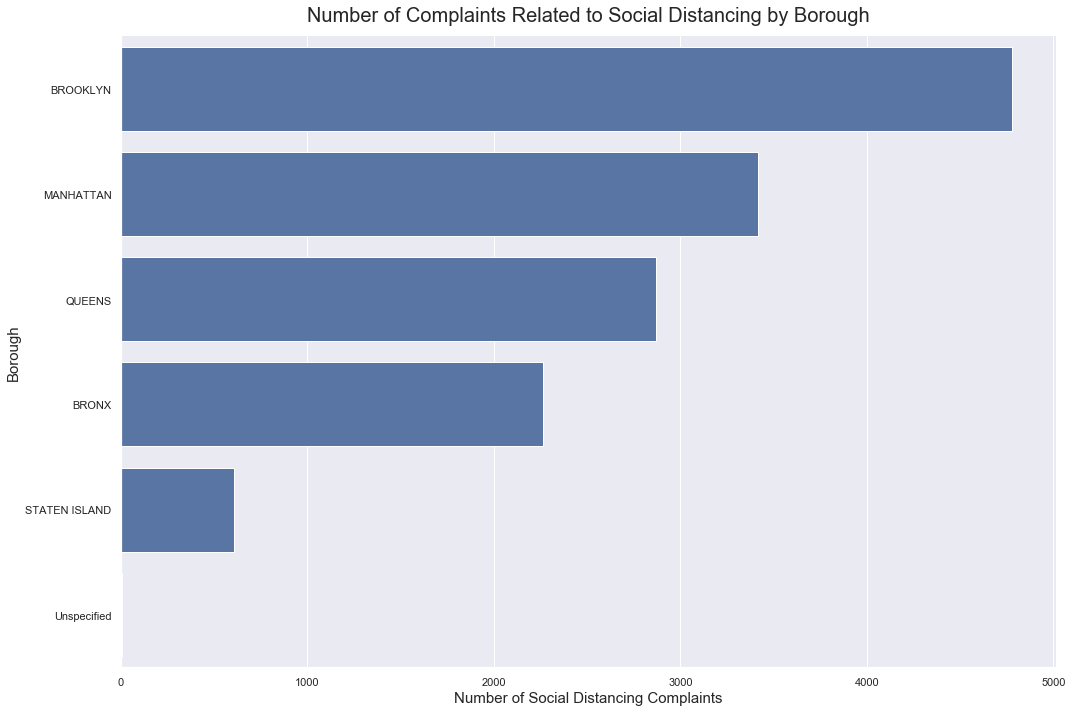

In [19]:
idx = social_distancing.groupby('borough')['unique_key'].count().sort_values(ascending=False)
idx = idx.index
order = idx.tolist()

plt.figure(figsize=(15,10))
sns.catplot(y="borough", 
            kind="count", 
            data = social_distancing, 
            color="C0",
            height = 10, 
            aspect = 1.5, 
            order=order)

plt.xlabel('Number of Social Distancing Complaints', fontsize=15)
plt.ylabel('Borough', fontsize=15)
plt.title('Number of Complaints Related to Social Distancing by Borough', 
          pad = 15, fontsize=20)
plt.tight_layout()
plt.savefig('figures/complaints_by_borough')

/Users/geribauer/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


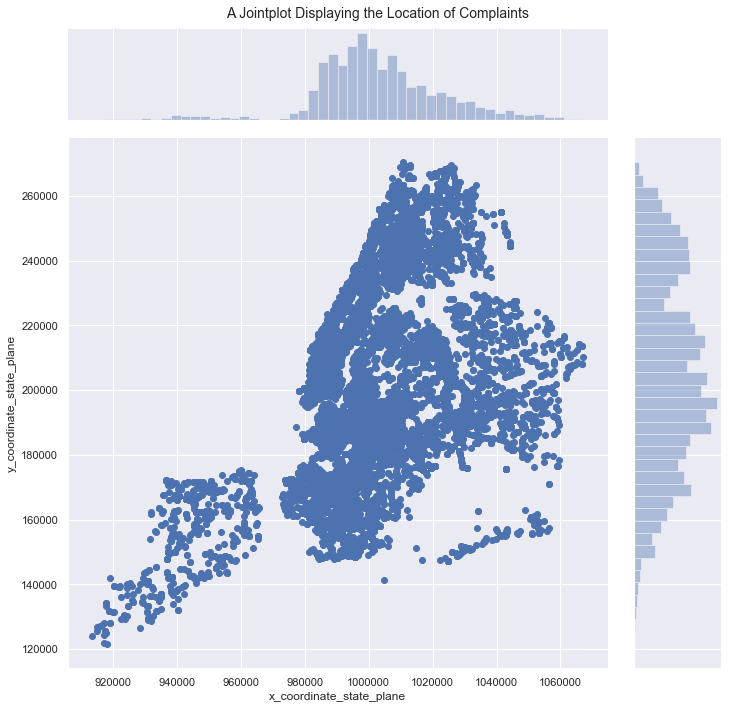

In [20]:
pp = sns.jointplot(x="x_coordinate_state_plane", 
              y="y_coordinate_state_plane", 
              height = 10, 
              data=social_distancing)

txt = ("A Hexbin Plot Displaying the Density of Complaints, "
+ "as well as KDE plots for both x and y coordinates.")

fig = pp.fig 
fig.subplots_adjust(top=0.95, wspace=0.3)
fig.suptitle('A Jointplot Displaying the Location of Complaints', 
            fontsize=14)
plt.savefig('figures/jointplot_location_complaints', bbox_inches='tight')

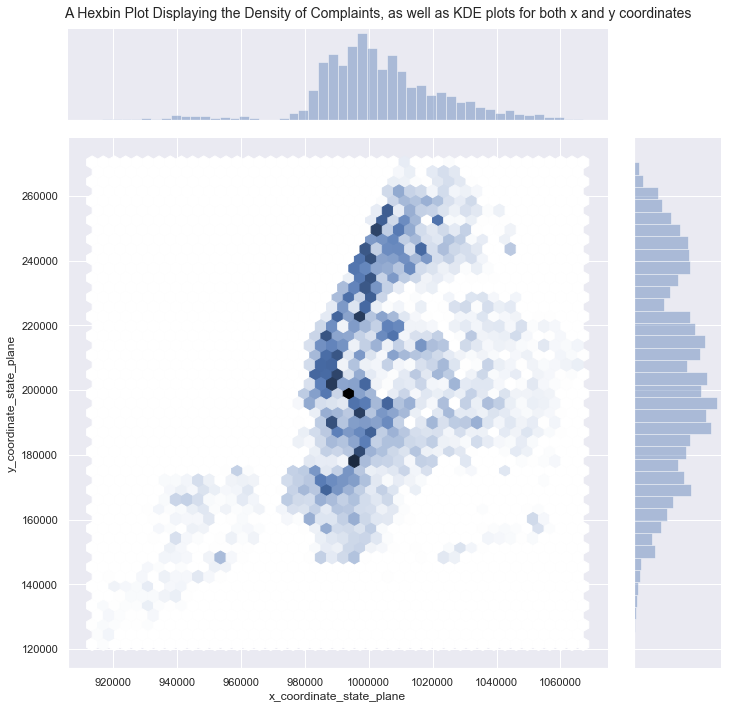

In [21]:
pp = sns.jointplot(x="x_coordinate_state_plane", 
              y="y_coordinate_state_plane", 
              kind = 'hex', 
              height = 10, 
              data=social_distancing)

fig = pp.fig 
fig.subplots_adjust(top=0.95, wspace=0.3)
fig.suptitle('A Hexbin Plot Displaying the Density of Complaints,'
            + ' as well as KDE plots for both x and y coordinates', 
            fontsize=14)

plt.savefig('figures/jointplot_hexbin_location_complaints', bbox_inches='tight')

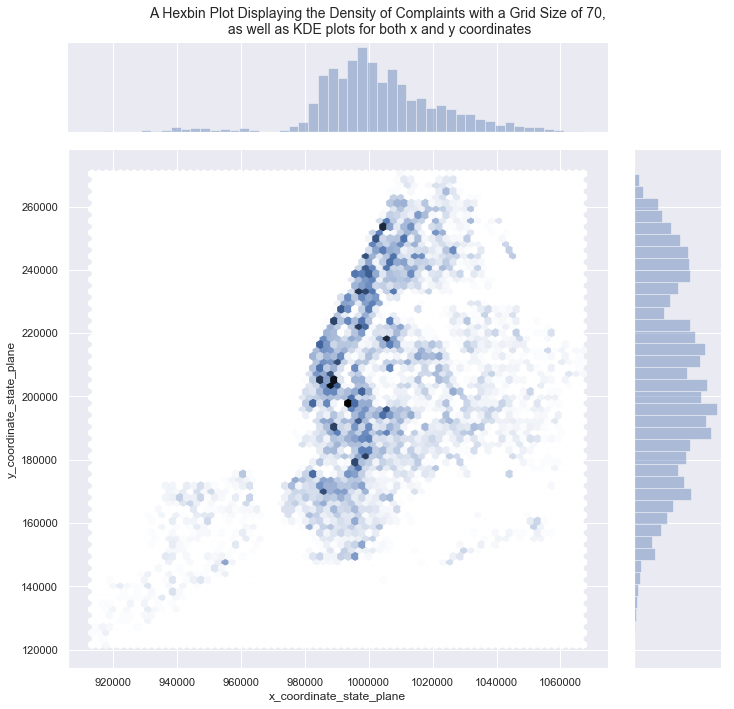

In [22]:
pp = sns.jointplot(x="x_coordinate_state_plane", 
              y="y_coordinate_state_plane", 
              kind = 'hex', 
              height = 10, 
              data=social_distancing, 
              joint_kws = dict(gridsize=70))

fig = pp.fig 
fig.subplots_adjust(top=0.93, wspace=0.3)
fig.suptitle('A Hexbin Plot Displaying the Density of Complaints with a Grid Size of 70,\n'
            + ' as well as KDE plots for both x and y coordinates', 
            fontsize=14)

plt.savefig('figures/jointplot_hexbin_2_location_complaints', bbox_inches='tight')

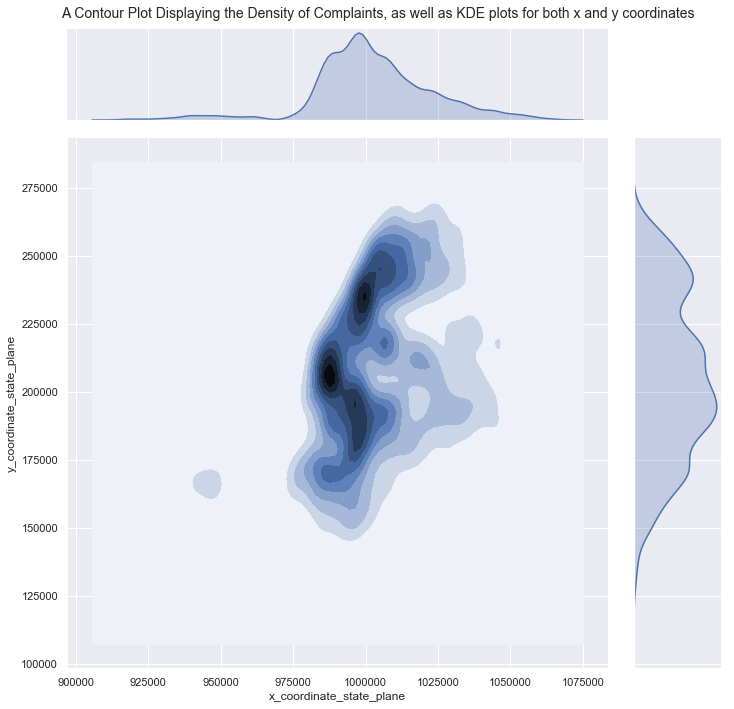

In [23]:
pp = sns.jointplot(x="x_coordinate_state_plane", 
              y="y_coordinate_state_plane", 
              kind = 'kde', 
              height = 10, 
              data=social_distancing)

fig = pp.fig 
fig.subplots_adjust(top=0.95, wspace=0.3)
fig.suptitle('A Contour Plot Displaying the Density of Complaints,'
            + ' as well as KDE plots for both x and y coordinates', 
              fontsize=14)

plt.savefig('figures/jointplot_contour_location_complaints', bbox_inches='tight')

/Users/geribauer/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/Users/geribauer/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


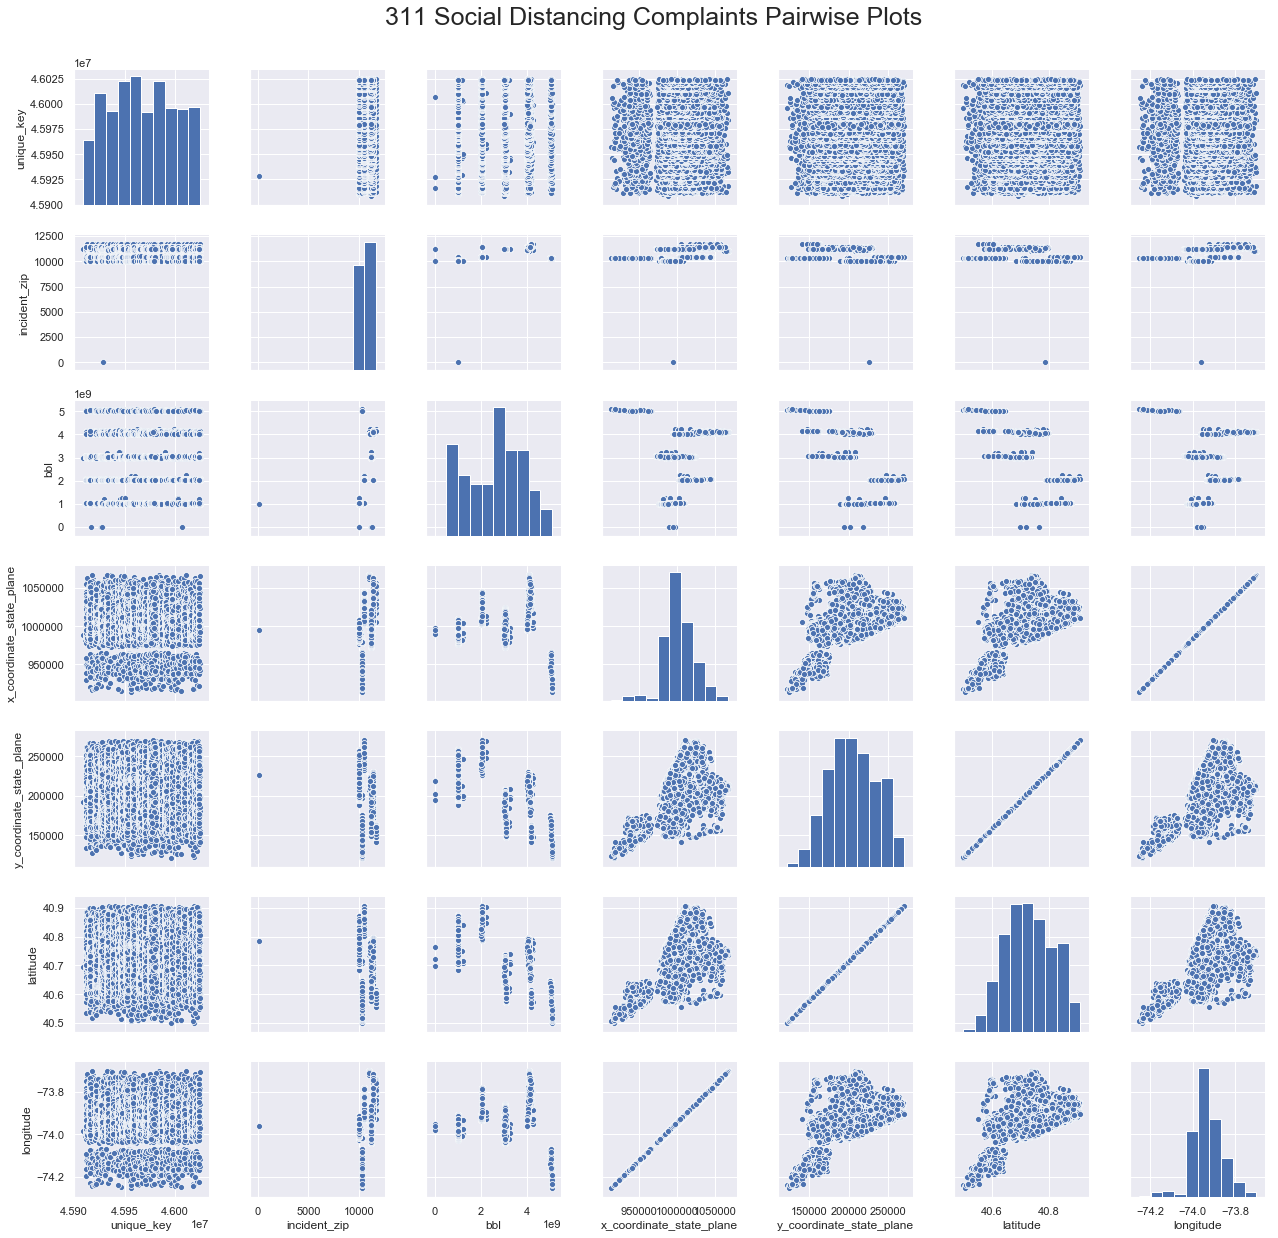

In [24]:
pp = sns.pairplot(social_distancing)

fig = pp.fig 
fig.subplots_adjust(top=0.93, wspace=0.3)
fig.suptitle('311 Social Distancing Complaints Pairwise Plots', 
              fontsize=25)

plt.savefig('figures/pairwise_plots', bbox_inches='tight')

In [25]:
# creating a geometry column 
geometry = [Point(xy) for xy in zip(social_distancing['x_coordinate_state_plane'], social_distancing['y_coordinate_state_plane'])]

In [26]:
# Creating a Geographic data frame 

crs = {'init': 'epsg:2263'}

gdf = gpd.GeoDataFrame(social_distancing, crs=crs, geometry=geometry)

In [27]:
social_distancing

,unique_key,created_date,closed_date,agency,agency_name,complaint_type,descriptor,location_type,incident_zip,incident_address,...,borough,x_coordinate_state_plane,y_coordinate_state_plane,open_data_channel_type,park_facility_name,park_borough,latitude,longitude,location,geometry
0,45975594,2020-04-11T01:50:25.000,2020-04-11T02:27:47.000,NYPD,New York City Police Department,Non-Emergency Police Matter,Social Distancing,Residential Building/House,10025.0,222 WEST 104 STREET,...,MANHATTAN,993247.0,230550.0,ONLINE,Unspecified,MANHATTAN,40.799478,-73.967504,"{'latitude': '40.799477899696285', 'longitude'...",POINT (993247 230550)
1,45975654,2020-04-11T00:14:28.000,2020-04-11T02:17:36.000,NYPD,New York City Police Department,Non-Emergency Police Matter,Social Distancing,NaN,10451.0,304 EAST 156 STREET,...,BRONX,1006604.0,238672.0,PHONE,Unspecified,BRONX,40.821747,-73.919234,"{'latitude': '40.82174682885639', 'longitude':...",POINT (1006604 238672)
2,45979340,2020-04-11T01:23:11.000,2020-04-11T02:51:58.000,NYPD,New York City Police Department,Non-Emergency Police Matter,Social Distancing,Residential Building/House,10301.0,16 YORK AVENUE,...,STATEN ISLAND,959527.0,174678.0,PHONE,Unspecified,STATEN ISLAND,40.646093,-74.089090,"{'latitude': '40.64609289425298', 'longitude':...",POINT (959527 174678)
3,45979351,2020-04-11T01:40:59.000,2020-04-11T03:12:06.000,NYPD,New York City Police Department,Non-Emergency Police Matter,Social Distancing,Store/Commercial,11238.0,325 LAFAYETTE AVENUE,...,BROOKLYN,994710.0,190164.0,ONLINE,Unspecified,BROOKLYN,40.688627,-73.962283,"{'latitude': '40.68862684267836', 'longitude':...",POINT (994710 190164)
4,45980013,2020-04-11T00:54:43.000,2020-04-11T10:07:20.000,NYPD,New York City Police Department,Non-Emergency Police Matter,Social Distancing,Store/Commercial,10465.0,815 HUTCHINSON RIVER PARKWAY,...,BRONX,1029523.0,239410.0,PHONE,Unspecified,BRONX,40.823685,-73.836422,"{'latitude': '40.823684692606086', 'longitude'...",POINT (1029523 239410)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13930,45978013,2020-04-11T00:51:44.000,2020-04-11T01:12:01.000,NYPD,New York City Police Department,Non-Emergency Police Matter,Social Distancing,Residential Building/House,11427.0,219-39 89 AVENUE,...,QUEENS,1055290.0,205031.0,ONLINE,Unspecified,QUEENS,40.729154,-73.743685,"{'latitude': '40.72915414322092', 'longitude':...",POINT (1055290 205031)
13931,45976500,2020-04-10T13:23:19.000,2020-04-10T14:14:24.000,NYPD,New York City Police Department,Non-Emergency Police Matter,Social Distancing,Store/Commercial,11220.0,140 58 STREET,...,BROOKLYN,977905.0,174391.0,ONLINE,Unspecified,BROOKLYN,40.645337,-74.022864,"{'latitude': '40.64533737627992', 'longitude':...",POINT (977905 174391)
13932,45980398,2020-04-10T16:42:47.000,2020-04-10T19:43:46.000,NYPD,New York City Police Department,Non-Emergency Police Matter,Social Distancing,NaN,10458.0,2510 VALENTINE AVENUE,...,BRONX,1013144.0,253599.0,PHONE,Unspecified,BRONX,40.862698,-73.895540,"{'latitude': '40.86269808076662', 'longitude':...",POINT (1013144 253599)
13933,45980334,2020-04-10T10:47:30.000,2020-04-10T10:49:44.000,NYPD,New York City Police Department,Non-Emergency Police Matter,Social Distancing,NaN,11205.0,128 FRANKLIN AVENUE,...,BROOKLYN,995851.0,192544.0,PHONE,Unspecified,BROOKLYN,40.695158,-73.958165,"{'latitude': '40.69515797051219', 'longitude':...",POINT (995851 192544)


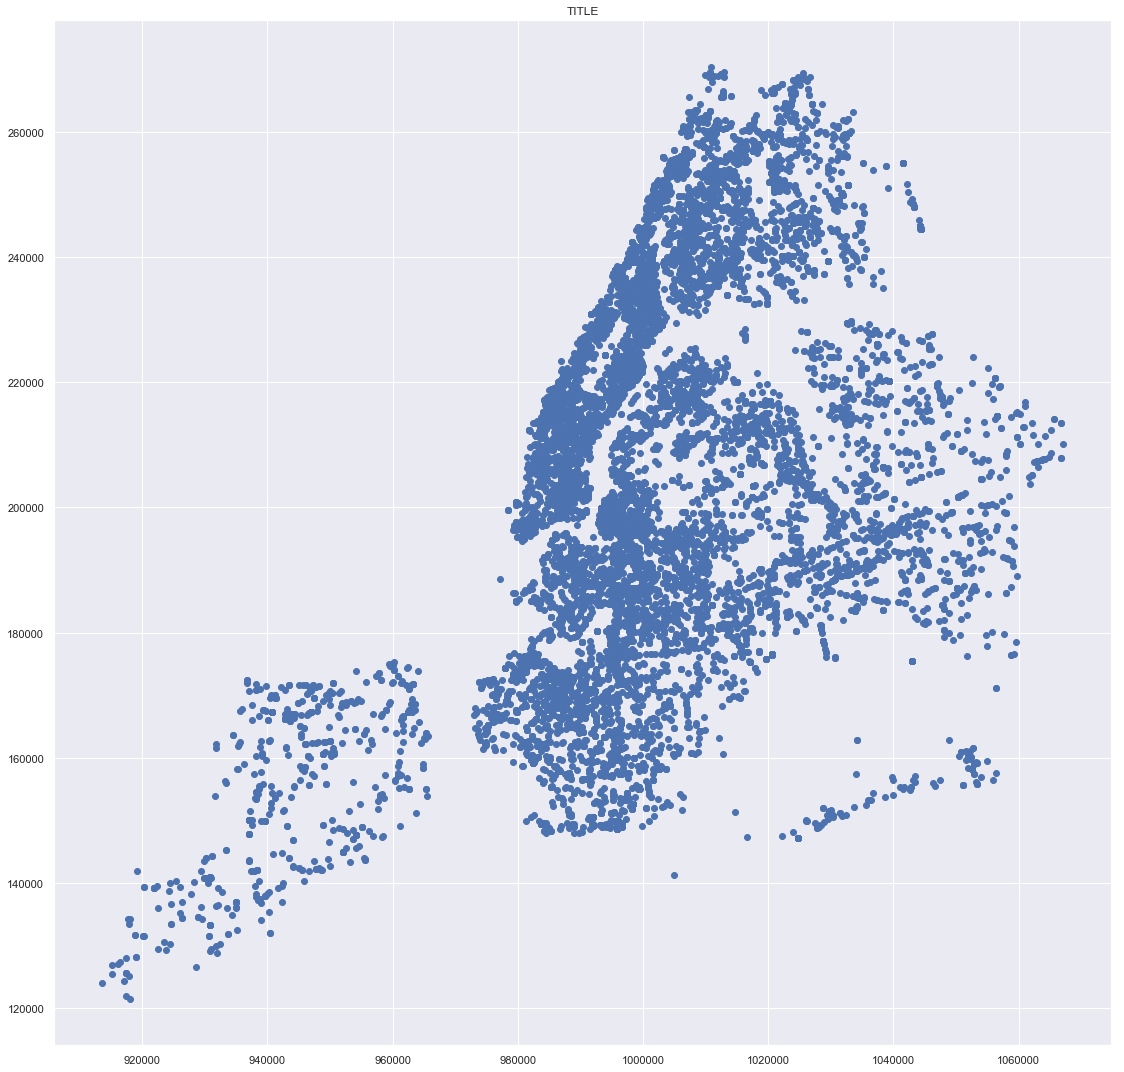

In [28]:
fig, ax = plt.subplots(figsize=(20,15))

gdf.plot(ax=ax)
plt.title('TITLE')
plt.tight_layout()
plt.savefig('figures/map_location_complaints')

In [29]:
pie = social_distancing.groupby('borough')['unique_key'].count()
pie.rename("count", inplace=True)
pie.sort_values(ascending=False, inplace=True)
pie

borough
BROOKLYN         4776
MANHATTAN        3414
QUEENS           2870
BRONX            2265
STATEN ISLAND     607
Unspecified         3
Name: count, dtype: int64

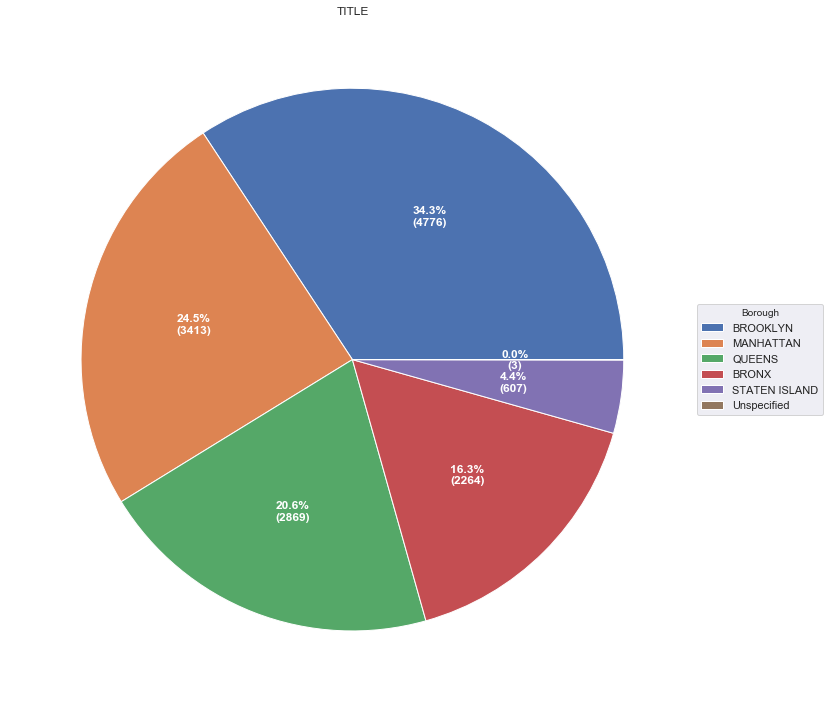

In [30]:
fig, ax = plt.subplots(figsize=(15, 10), subplot_kw=dict(aspect="equal"))

def func(pct, allvals):
    absolute = int(pct/100.*np.sum(allvals))
    return "{:.1f}%\n({:d})".format(pct, absolute)

wedges, texts, autotexts = ax.pie(pie, autopct=lambda pct: func(pct, pie),
                                  textprops=dict(color="w"))

ax.legend(wedges, pie.index,
          title="Borough",
          loc="center left",
          bbox_to_anchor=(1, 0, 0.5, 1)) 

plt.setp(autotexts, size=12, weight="bold")
plt.title('TITLE')
plt.tight_layout()
plt.savefig('figures/pie_complaints_borough')

In [31]:
social_distancing.head()

,unique_key,created_date,closed_date,agency,agency_name,complaint_type,descriptor,location_type,incident_zip,incident_address,...,borough,x_coordinate_state_plane,y_coordinate_state_plane,open_data_channel_type,park_facility_name,park_borough,latitude,longitude,location,geometry
0,45975594,2020-04-11T01:50:25.000,2020-04-11T02:27:47.000,NYPD,New York City Police Department,Non-Emergency Police Matter,Social Distancing,Residential Building/House,10025.0,222 WEST 104 STREET,...,MANHATTAN,993247.0,230550.0,ONLINE,Unspecified,MANHATTAN,40.799478,-73.967504,"{'latitude': '40.799477899696285', 'longitude'...",POINT (993247 230550)
1,45975654,2020-04-11T00:14:28.000,2020-04-11T02:17:36.000,NYPD,New York City Police Department,Non-Emergency Police Matter,Social Distancing,NaN,10451.0,304 EAST 156 STREET,...,BRONX,1006604.0,238672.0,PHONE,Unspecified,BRONX,40.821747,-73.919234,"{'latitude': '40.82174682885639', 'longitude':...",POINT (1006604 238672)
2,45979340,2020-04-11T01:23:11.000,2020-04-11T02:51:58.000,NYPD,New York City Police Department,Non-Emergency Police Matter,Social Distancing,Residential Building/House,10301.0,16 YORK AVENUE,...,STATEN ISLAND,959527.0,174678.0,PHONE,Unspecified,STATEN ISLAND,40.646093,-74.089090,"{'latitude': '40.64609289425298', 'longitude':...",POINT (959527 174678)
3,45979351,2020-04-11T01:40:59.000,2020-04-11T03:12:06.000,NYPD,New York City Police Department,Non-Emergency Police Matter,Social Distancing,Store/Commercial,11238.0,325 LAFAYETTE AVENUE,...,BROOKLYN,994710.0,190164.0,ONLINE,Unspecified,BROOKLYN,40.688627,-73.962283,"{'latitude': '40.68862684267836', 'longitude':...",POINT (994710 190164)
4,45980013,2020-04-11T00:54:43.000,2020-04-11T10:07:20.000,NYPD,New York City Police Department,Non-Emergency Police Matter,Social Distancing,Store/Commercial,10465.0,815 HUTCHINSON RIVER PARKWAY,...,BRONX,1029523.0,239410.0,PHONE,Unspecified,BRONX,40.823685,-73.836422,"{'latitude': '40.823684692606086', 'longitude'...",POINT (1029523 239410)


In [32]:
# transforming our 'Year' index to datetime
social_distancing.created_date = pd.to_datetime(social_distancing.created_date, infer_datetime_format=True)

social_distancing.dtypes

unique_key                                 int64
created_date                      datetime64[ns]
closed_date                               object
agency                                    object
agency_name                               object
complaint_type                            object
descriptor                                object
location_type                             object
incident_zip                             float64
incident_address                          object
street_name                               object
cross_street_1                            object
cross_street_2                            object
intersection_street_1                     object
intersection_street_2                     object
city                                      object
landmark                                  object
status                                    object
resolution_description                    object
resolution_action_updated_date            object
community_board     

In [33]:
social_distancing['NewDate'] = social_distancing.created_date.dt.strftime("%Y-%m-%d")

In [34]:
social_distancing.head()

,unique_key,created_date,closed_date,agency,agency_name,complaint_type,descriptor,location_type,incident_zip,incident_address,...,x_coordinate_state_plane,y_coordinate_state_plane,open_data_channel_type,park_facility_name,park_borough,latitude,longitude,location,geometry,NewDate
0,45975594,2020-04-11 01:50:25,2020-04-11T02:27:47.000,NYPD,New York City Police Department,Non-Emergency Police Matter,Social Distancing,Residential Building/House,10025.0,222 WEST 104 STREET,...,993247.0,230550.0,ONLINE,Unspecified,MANHATTAN,40.799478,-73.967504,"{'latitude': '40.799477899696285', 'longitude'...",POINT (993247 230550),2020-04-11
1,45975654,2020-04-11 00:14:28,2020-04-11T02:17:36.000,NYPD,New York City Police Department,Non-Emergency Police Matter,Social Distancing,NaN,10451.0,304 EAST 156 STREET,...,1006604.0,238672.0,PHONE,Unspecified,BRONX,40.821747,-73.919234,"{'latitude': '40.82174682885639', 'longitude':...",POINT (1006604 238672),2020-04-11
2,45979340,2020-04-11 01:23:11,2020-04-11T02:51:58.000,NYPD,New York City Police Department,Non-Emergency Police Matter,Social Distancing,Residential Building/House,10301.0,16 YORK AVENUE,...,959527.0,174678.0,PHONE,Unspecified,STATEN ISLAND,40.646093,-74.089090,"{'latitude': '40.64609289425298', 'longitude':...",POINT (959527 174678),2020-04-11
3,45979351,2020-04-11 01:40:59,2020-04-11T03:12:06.000,NYPD,New York City Police Department,Non-Emergency Police Matter,Social Distancing,Store/Commercial,11238.0,325 LAFAYETTE AVENUE,...,994710.0,190164.0,ONLINE,Unspecified,BROOKLYN,40.688627,-73.962283,"{'latitude': '40.68862684267836', 'longitude':...",POINT (994710 190164),2020-04-11
4,45980013,2020-04-11 00:54:43,2020-04-11T10:07:20.000,NYPD,New York City Police Department,Non-Emergency Police Matter,Social Distancing,Store/Commercial,10465.0,815 HUTCHINSON RIVER PARKWAY,...,1029523.0,239410.0,PHONE,Unspecified,BRONX,40.823685,-73.836422,"{'latitude': '40.823684692606086', 'longitude'...",POINT (1029523 239410),2020-04-11


In [35]:
g = social_distancing.groupby('NewDate')['unique_key'].count().reset_index()

g.rename({'unique_key': 'count'}, axis=1, inplace=True)

In [36]:
g.head(20)

,NewDate,count
0,2020-03-28,2
1,2020-03-29,262
2,2020-03-30,776
3,2020-03-31,682
4,2020-04-01,792
5,2020-04-02,607
6,2020-04-03,436
7,2020-04-04,694
8,2020-04-05,599
9,2020-04-06,963


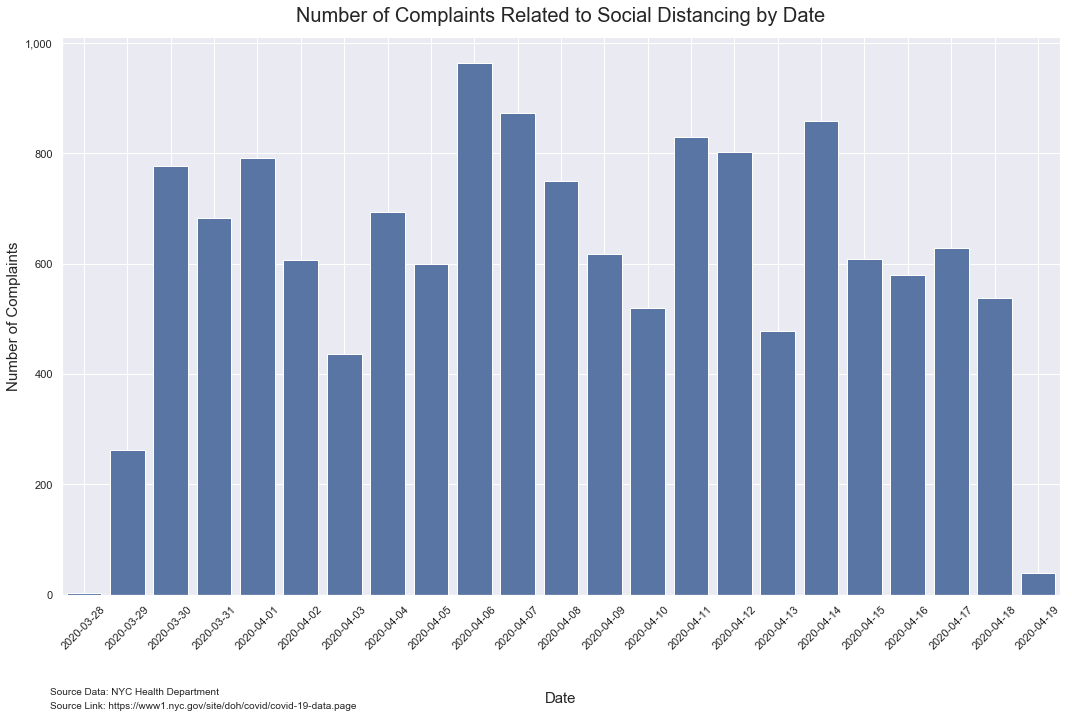

In [37]:
fig, ax1 = plt.subplots(figsize=(15,10))
txt = ('Source Data: NYC Health Department')
txt2 = ('Source Link: https://www1.nyc.gov/site/doh/covid/covid-19-data.page')

sns.barplot(x="NewDate", 
            y="count",
            color="C0",
            data=g)

ax1.get_yaxis().set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
ax1.xaxis.labelpad = 40

ax1.grid(True)
ax1.grid(axis='x', which='minor')
plt.xticks(rotation=45)

#ax1.legend_.remove()
ax1.set_xlabel('Date', fontsize=15)
ax1.set_ylabel('Number of Complaints', fontsize=15)
plt.title('Number of Complaints Related to Social Distancing by Date', pad = 15, fontsize=20)
plt.figtext(0.05, 0.03, txt, wrap=True, horizontalalignment='left', fontsize=10)
plt.figtext(0.05, 0.01, txt2, wrap=True, horizontalalignment='left', fontsize=10)

plt.tight_layout()
plt.savefig('figures/timeseries')

In [38]:
borough = social_distancing.groupby(['borough', 'NewDate'])['unique_key'].count().reset_index()

In [39]:
borough.rename({'unique_key': 'count'}, axis=1, inplace=True)

In [40]:
borough.head()

,borough,NewDate,count
0,BRONX,2020-03-29,37
1,BRONX,2020-03-30,86
2,BRONX,2020-03-31,98
3,BRONX,2020-04-01,106
4,BRONX,2020-04-02,91


In [41]:
borough.sort_values(by='NewDate', inplace=True)

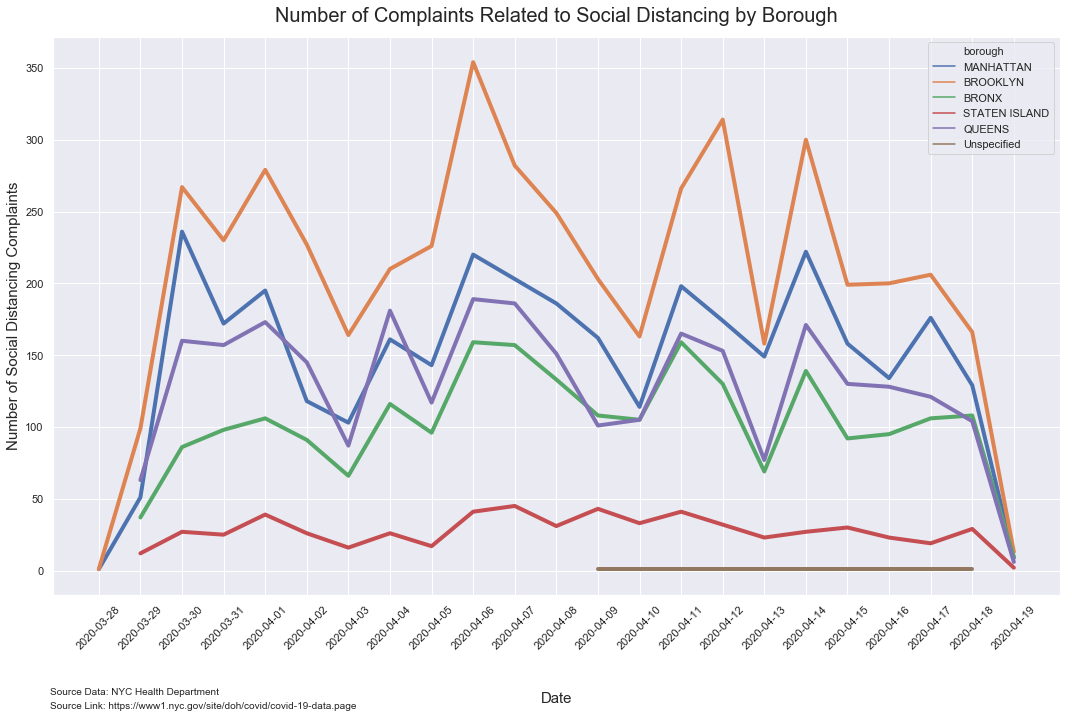

In [42]:
fig, ax1 = plt.subplots(figsize=(15,10))
txt = ('Source Data: NYC Health Department')
txt2 = ('Source Link: https://www1.nyc.gov/site/doh/covid/covid-19-data.page')

sns.lineplot(x="NewDate", 
            y="count",
            hue="borough",
            data=borough,
            linewidth=4)

ax1.get_yaxis().set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
ax1.xaxis.labelpad = 40

ax1.grid(True)
ax1.grid(axis='x', which='minor')
plt.xticks(rotation=45)

#ax1.legend_.remove()
ax1.set_xlabel('Date', fontsize=15)
ax1.set_ylabel('Number of Social Distancing Complaints', fontsize=15)
plt.title('Number of Complaints Related to Social Distancing by Borough', pad = 15, fontsize=20)
plt.figtext(0.05, 0.03, txt, wrap=True, horizontalalignment='left', fontsize=10)
plt.figtext(0.05, 0.01, txt2, wrap=True, horizontalalignment='left', fontsize=10)

plt.tight_layout()
plt.savefig('figures/timeseries_by_borough')